# Hyperspectral analysis on fructose 

## Read & format 

In [ ]:
pip install spectral 

     |████████████████████████████████| 212 kB 5.2 MB/s 


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from spectral import *

### Sugar sample

In [ ]:
hsi_sugar = open_image('/content/drive/MyDrive/verano multiespectral/azucar 2 /azucar__2022-01-28_19-22-15/capture/azucar__2022-01-28_19-22-15.hdr')
hsi_wet_sugar = open_image('/content/drive/MyDrive/verano multiespectral/azucar 2 /azucar__2022-01-28_19-26-00/capture/azucar__2022-01-28_19-26-00.hdr')

/usr/local/lib/python3.7/dist-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [ ]:
hsi_sugar.bands.centers[0], hsi_sugar.bands.centers[-1]

(397.01, 1004.52)

In [ ]:
hsi_wet_sugar.bands.centers[0], hsi_wet_sugar.bands.centers[-1]

(397.01, 1004.52)

In [ ]:
hsi_sugar.shape, hsi_wet_sugar.shape

((3397, 1024, 448), (3335, 1024, 448))

<function matplotlib.pyplot.show>

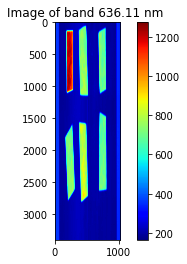

In [ ]:
sample_band = 180
sample_band_img = hsi_sugar[:,:,sample_band]
plt.figure(1)
plt.clf()
plt.imshow(np.squeeze(sample_band_img),cmap='jet')
plt.title('Image of band ' + str(hsi_sugar.bands.centers[sample_band]) + ' nm '  )
plt.colorbar()
plt.show

<function matplotlib.pyplot.show>

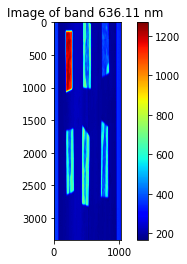

In [ ]:
sample_band = 180
sample_band_img = hsi_wet_sugar[:,:,sample_band]
plt.figure(1)
plt.clf()
plt.imshow(np.squeeze(sample_band_img),cmap='jet')
plt.title('Image of band ' + str(hsi_wet_sugar.bands.centers[sample_band]) + ' nm '  )
plt.colorbar()
plt.show

<function matplotlib.pyplot.show>

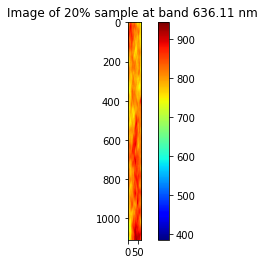

In [ ]:
# 20% sample cutted 
hsi_20_sugar = hsi_sugar[1600:2710,400:470,:]
hsi_20_sugar_sample = hsi_20_sugar[:,:,180]
plt.figure(1)
plt.clf()
plt.imshow(np.squeeze(hsi_20_sugar_sample),cmap='jet')
plt.title('Image of 20% sample at band ' + str(hsi_sugar.bands.centers[180]) + ' nm '  )
plt.colorbar()
plt.show

<function matplotlib.pyplot.show>

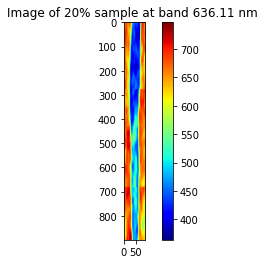

In [ ]:
# 20% sample cutted 
hsi_20_wet_sugar = hsi_wet_sugar[1800:2700,430:520,:]
hsi_20_wet_sugar_sample = hsi_20_wet_sugar[:,:,180]
plt.figure(1)
plt.clf()
plt.imshow(np.squeeze(hsi_20_wet_sugar_sample),cmap='jet')
plt.title('Image of 20% sample at band ' + str(hsi_wet_sugar.bands.centers[180]) + ' nm '  )
plt.colorbar()
plt.show

In [ ]:
hsi_20_sugar.shape

(1110, 70, 448)

### Fruit sample

In [ ]:
hsi_fruit = open_image('/content/drive/MyDrive/verano multiespectral/imagenes/Guayabas 2/GUAYABAS_210820_M_5-6-7-8_2021-08-20_18-23-30/capture/GUAYABAS_210820_M_5-6-7-8_2021-08-20_18-23-30.hdr')

/usr/local/lib/python3.7/dist-packages/spectral/io/envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [ ]:
hsi_fruit.bands.centers[0], hsi_fruit.bands.centers[-1]

(398.89, 1001.17)

In [ ]:
hsi_fruit.shape

(3109, 1024, 224)

<function matplotlib.pyplot.show>

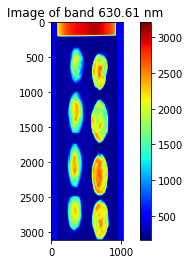

In [ ]:
sample_band = 88
sample_band_img = hsi_fruit[:,:,88]
plt.figure(1)
plt.clf()
plt.imshow(np.squeeze(sample_band_img),cmap='jet')
plt.title('Image of band ' + str(hsi_fruit.bands.centers[sample_band]) + ' nm '  )
plt.colorbar()
plt.show

<function matplotlib.pyplot.show>

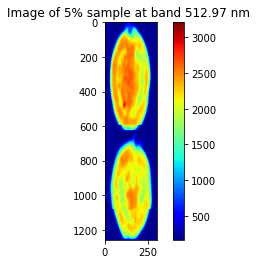

In [ ]:
# Pulp side fruits
hsi_pulp_fruit = hsi_fruit[1850:,550:850,:]
hsi_pulp_fruit_sample = hsi_pulp_fruit[:,:,88]
plt.figure(1)
plt.clf()
plt.imshow(np.squeeze(hsi_pulp_fruit_sample),cmap='jet')
plt.title('Image of 5% sample at band ' + str(hsi_sugar.bands.centers[88]) + ' nm '  )
plt.colorbar()
plt.show

## PCA

In [ ]:
hsi_20_sugar.shape

(1110, 70, 448)

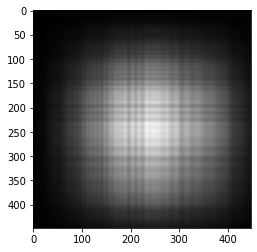

In [ ]:
pc_20_sugar = principal_components(hsi_20_sugar)
v = imshow(pc_20_sugar.cov)

In [ ]:
# Reduce bands to 50 to keep 98% variance
pc_20_sugar_098 = pc_20_sugar.reduce(num=50)
len(pc_20_sugar_098.eigenvalues)

50

In [ ]:
hsi_20_sugar_pc = pc_20_sugar_098.transform(hsi_20_sugar)

<function matplotlib.pyplot.show>

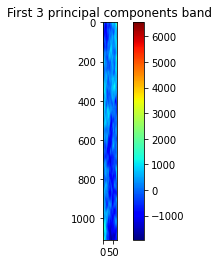

In [ ]:
hsi_20_sugar_pc_sample = hsi_20_sugar_pc[:,:,0]
plt.figure(1)
plt.clf()
plt.imshow(hsi_20_sugar_pc_sample,cmap='jet')
plt.title('First 3 principal components band')
plt.colorbar()
plt.show

In [ ]:
hsi_20_sugar_pc.shape

(1110, 70, 50)

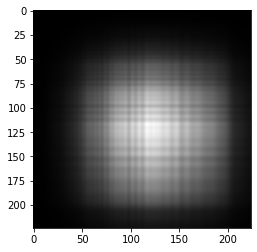

In [ ]:
pc_pulp_fruit = principal_components(hsi_pulp_fruit)
v = imshow(pc_pulp_fruit.cov)

In [ ]:
# Reduce bands to 50 to keep 98% variance
pc_pulp_fruit_098 = pc_pulp_fruit.reduce(num=50)
len(pc_pulp_fruit_098.eigenvalues)

50

In [ ]:
hsi_pulp_fruit_pc = pc_pulp_fruit_098.transform(hsi_pulp_fruit)

<function matplotlib.pyplot.show>

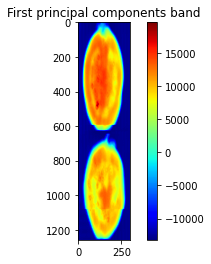

In [ ]:
hsi_pulp_fruit_pc_sample = hsi_pulp_fruit_pc[:,:,0]
plt.figure(1)
plt.clf()
plt.imshow(hsi_pulp_fruit_pc_sample,cmap='jet')
plt.title('First principal components band')
plt.colorbar()
plt.show

In [ ]:
hsi_pulp_fruit_pc.shape

(1259, 300, 50)

## Endmembers extraction 

In [ ]:
pip install pysptools

     |████████████████████████████████| 8.1 MB 4.4 MB/s 
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133751 sha256=bc66bdf10c693428ed569cce4167d190b116922bcba3e47504f8fb4c666a2212
  Stored in directory: /root/.cache/pip/wheels/ee/61/31/fb8bf9e1d7508efcfce674a9dc4ac98e67cfe875a5567c4e7e
Successfully built pysptools


In [ ]:
import pysptools.util as util
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt

In [ ]:
def get_endmembers(hsi_cutted, hsi_original, num_end_members, pc=0): 
    end_mmbrs_findr = eea.NFINDR()
    end_mmbrs = end_mmbrs_findr.extract(hsi_cutted, num_end_members, maxit=5, normalize=False,ATGP_init=True)

    if (pc == 0):
      wavelengths = hsi_original.bands.centers
    else: 
      wavelengths = pc

    ee_axes = {} # set ee_axes data type to dictionary
    # cast wavelength values to float to apply to ee_axes for display purposes 
    ee_axes['wavelength'] = wavelengths
    ee_axes['x']='Wavelength, nm' #x axis label 
    ee_axes['y']='Reflectance' #y axis label 

    end_mmbrs_findr.display(axes=ee_axes)
    return end_mmbrs

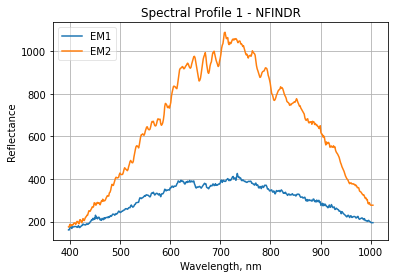

In [ ]:
end_mmbrs_20_sugar = get_endmembers(hsi_20_sugar, hsi_sugar, 2)

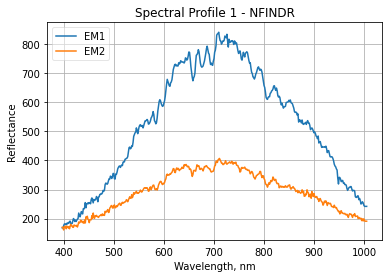

In [ ]:
end_mmbrs_20_wet_sugar = get_endmembers(hsi_20_wet_sugar, hsi_wet_sugar, 2)

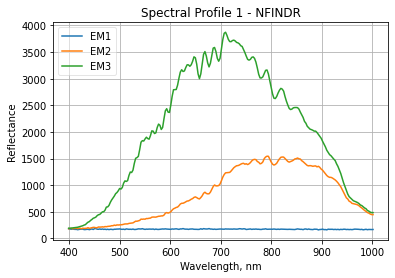

In [ ]:
end_mmbrs_pulp_fruit = get_endmembers(hsi_pulp_fruit, hsi_fruit, 3)

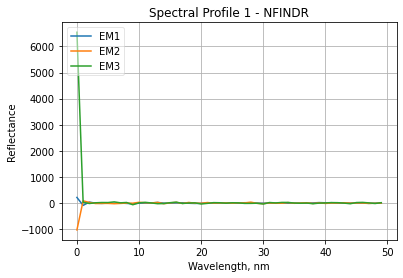

In [ ]:
end_mmbrs_20_sugar_pc = get_endmembers(hsi_20_sugar_pc, hsi_20_sugar_pc, 3, pc=list(range(50)))

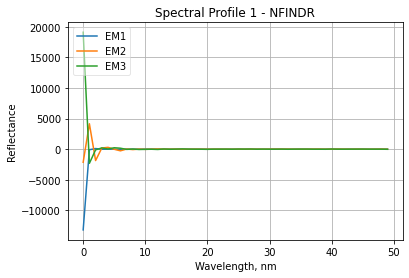

In [ ]:
end_mmbrs_pulp_fruit_pc = get_endmembers(hsi_pulp_fruit_pc, hsi_pulp_fruit_pc, 3, pc=list(range(50)))

## Abundancy maps

In [ ]:
def get_abundance_maps_FCLS(hsi_image, endmembers_to_map): 
    am = amap.FCLS() #define am object using the amap 
    amaps = am.map(hsi_image, endmembers_to_map, normalize=True) #create abundance maps for the HSI cubems

    am.display(colorMap='jet',columns=2)
    return am, amaps

/usr/local/lib/python3.7/dist-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


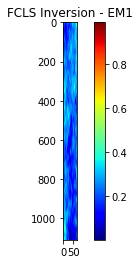

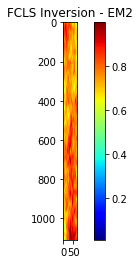

<Figure size 432x288 with 0 Axes>

In [ ]:
am_20_sugar, amaps_20_sugar = get_abundance_maps_FCLS(hsi_20_sugar, end_mmbrs_20_sugar)

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps_20_sugar[:,:,0]))
print('EM2:',np.mean(amaps_20_sugar[:,:,1]))
#print('EM3:',np.mean(amaps_20_sugar[:,:,2]))
#print('EM4:',np.mean(amaps_20_sugar[:,:,3]))

Abundance Map Mean Values:
EM1: 0.22607166
EM2: 0.7739284


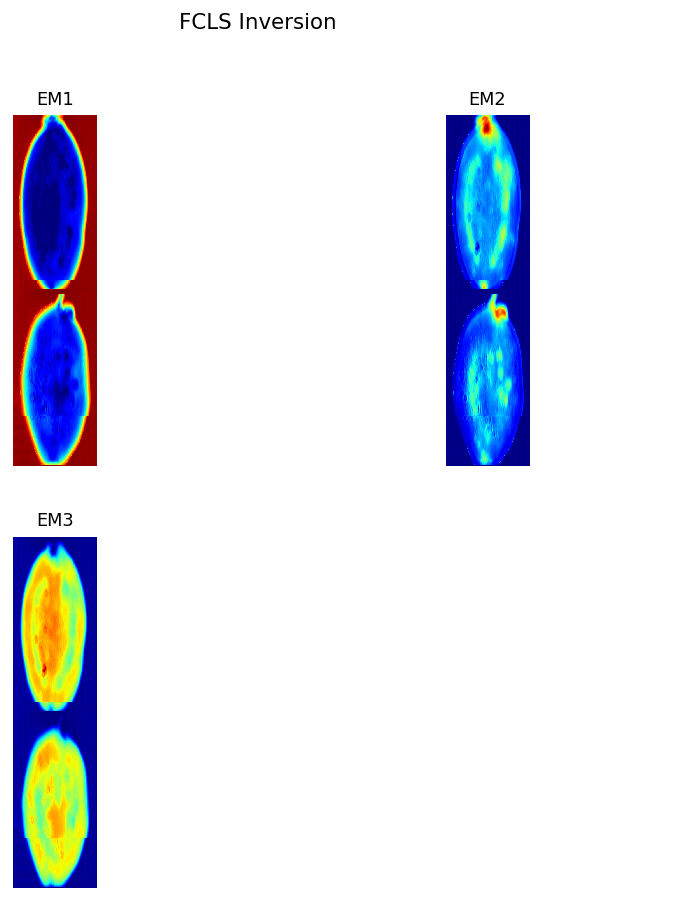

<Figure size 432x288 with 0 Axes>

In [ ]:
am_pulp_fruit, amaps_pulp_fruit = get_abundance_maps_FCLS(hsi_pulp_fruit, end_mmbrs_pulp_fruit)

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps_pulp_fruit[:,:,0]))
print('EM2:',np.mean(amaps_pulp_fruit[:,:,1]))
print('EM3:',np.mean(amaps_pulp_fruit[:,:,2]))

Abundance Map Mean Values:
EM1: 0.48421913
EM2: 0.17228894
EM3: 0.3434919


/usr/local/lib/python3.7/dist-packages/pysptools/abundance_maps/amaps_int.py:127: UserWarning: In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns
  warnings.warn('In abundance_map._plot_abundance_map, the number of abundances map to display is less or equal the number of columns')


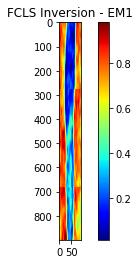

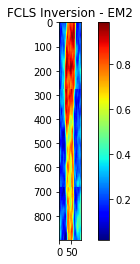

<Figure size 432x288 with 0 Axes>

In [ ]:
am_20_wet_sugar, amaps_20_wet_sugar = get_abundance_maps_FCLS(hsi_20_wet_sugar, end_mmbrs_20_wet_sugar)

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps_20_wet_sugar[:,:,0]))
print('EM2:',np.mean(amaps_20_wet_sugar[:,:,1]))

Abundance Map Mean Values:
EM1: 0.5585267
EM2: 0.44147325


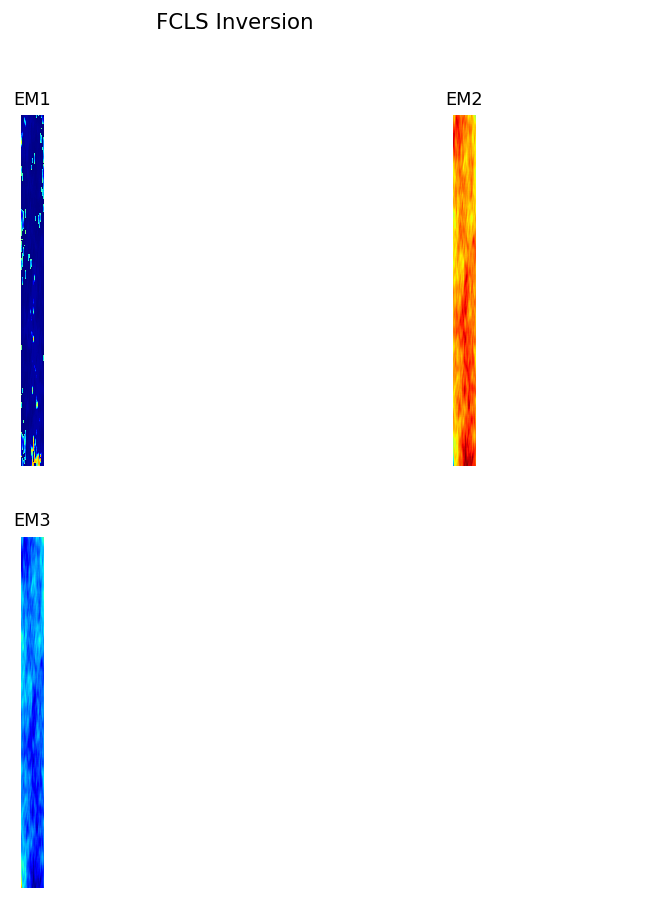

<Figure size 432x288 with 0 Axes>

In [ ]:
am_20_sugar_pc, amaps_20_sugar_pc = get_abundance_maps_FCLS(hsi_20_sugar_pc, end_mmbrs_20_sugar_pc)

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps_20_sugar_pc[:,:,0]))
print('EM2:',np.mean(amaps_20_sugar_pc[:,:,1]))
print('EM3:',np.mean(amaps_20_sugar_pc[:,:,2]))
#print('EM4:',np.mean(amaps_20_sugar[:,:,3]))

Abundance Map Mean Values:
EM1: 1.8460341e-05
EM2: 0.7707077
EM3: 0.22927387


### Classification of spectras

In [ ]:
def SID(data,E,thrs=None):
    sid = cls.SID()
    cmap = sid.classify(data,E,threshold=thrs)
    sid.display(colorMap='tab20b')

def abundance_classification(amaps, thrs=None):
    abundance_classif = cls.AbundanceClassification()
    cmap = abundance_classif.classify(amaps, thrs)
    abundance_classif.display()

/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:44: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  new_mp1 = {'blue': colors.makeMappingArray(N-1, mp['blue']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:45: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'green': colors.makeMappingArray(N-1, mp['green']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:46: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'red': colors.makeMappingArray(N-1, mp['red'])}


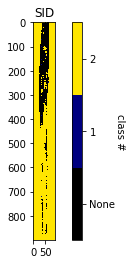

In [ ]:
#end_mmbrs_best = end_mmbrs[[1,2],:]
SID(hsi_20_wet_sugar, end_mmbrs_20_sugar, [0.2, 0.5])

/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:44: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  new_mp1 = {'blue': colors.makeMappingArray(N-1, mp['blue']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:45: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'green': colors.makeMappingArray(N-1, mp['green']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:46: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'red': colors.makeMappingArray(N-1, mp['red'])}


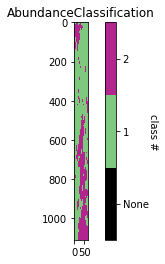

In [ ]:
abundance_classification(amaps_20_sugar, [0.2, 0.8])

/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:44: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  new_mp1 = {'blue': colors.makeMappingArray(N-1, mp['blue']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:45: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'green': colors.makeMappingArray(N-1, mp['green']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:46: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'red': colors.makeMappingArray(N-1, mp['red'])}


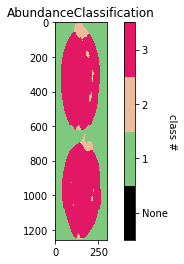

In [ ]:
abundance_classification(amaps_pulp_fruit, [0.5, 0.2, 0.3])

/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:44: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  new_mp1 = {'blue': colors.makeMappingArray(N-1, mp['blue']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:45: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'green': colors.makeMappingArray(N-1, mp['green']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:46: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'red': colors.makeMappingArray(N-1, mp['red'])}


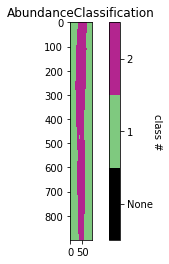

In [ ]:
abundance_classification(amaps_20_wet_sugar, thrs=[0.45,0.5])

/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:44: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  new_mp1 = {'blue': colors.makeMappingArray(N-1, mp['blue']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:45: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'green': colors.makeMappingArray(N-1, mp['green']),
/usr/local/lib/python3.7/dist-packages/pysptools/classification/out.py:46: MatplotlibDeprecationWarning: 
The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.
  'red': colors.makeMappingArray(N-1, mp['red'])}


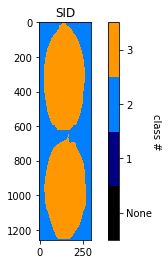

In [ ]:
SID(hsi_pulp_fruit_pc, end_mmbrs_20_sugar_pc, [0.00001,0.2, 0.6])